In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(0)
linestyles= ['-','--',':','-.']
# x 확률변수의 기대값
def E(XY,g): 
    x_set,y_set,f_XY= XY
    return np.sum([g(x_i,y_j)*f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])
def Cov(XY):
    x_set,y_set,f_XY=XY
    mean_X = E(XY,lambda x,y:x)
    mean_Y= E(XY,lambda x,y: y)
    return np.sum([(x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])
def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])


#### 독립동일분포
-  확률변수가 서로 독립이라는 것은 확률변수가 다른 확률변수에 영향을 끼치지 않는다는
의미이다.
- 통계분석에서 취급하는 데이터 중 상당수가 독립이면서 다차원인 확률변수의 실현값으로
간주될 수 있다.
- 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수를 독립동일분포라 한다.

#### 독립성(교집합 x)
- 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음을 나타내는 개념
- 2차원 확률변수(X,Y)의 경우 다음과 같은 관계가 성립할 때 X,Y는 독립이라고 함
$f_{X,Y}(x,y) = f_X(x)f_Y(y)$
- 확률변수가 독립일 때 결합확률은 주변확률의 곱으로 작성할 수 있다.
- 일반화: $f_{X_1,X_2,...X_n}(x_1.x_2....,x_n) = f_{X_1}(x_1)f_{X_2}(x_2)...f_{X_n}(x_n)$
    
※ 함수 f가 이산형이면 확률함수, 연속형이면 밀도함수를 나타냄



#### 독립성과 무상관성
- 공분산이나 상관계수가 0일 때, 무상관이라 하고 두 확률변수 사이에는 상관성, 즉 선형관계가
없음을 나타냄
- 독립성도 무상관성도 두 확률변수가 서로 관계가 없다는 것을 나타내는 성질이다.
 - 무상관성보다 독립성이 더 강한 개념
 - 2개의 확률변수 X와 Y가 독립일 때 X와 Y는 무상관이 되지만 X와 Y가 무상관일 때 X와 Y가 반드시
독립인 것은 아님


In [39]:
# 2차원 확률변수 X와 Y는 독립
# 공분산이 0이므로 무상관인 것을 알 수 있음
x_set = np.array([1,2,3,4,5,6])
y_set = np.array([1,2,3,4,5,6])

def f_XY(x,y):
    if x in x_set and y in y_set:
        return x*y /441
    else:
        return 0
XY= [x_set,y_set,f_XY]

Cov(XY)

-8.326672684688674e-17

In [43]:
# 무상관인 2개의 확률변수 생각해보자
x_set = np.array([0,1])
y_set = np.array([-1,0,1])

def f_XY(x,y):
    if (x,y) in [(0,0),(1,1),(1,-1)]:
        return 1/3
    else:
        return 0
XY= [x_set,y_set,f_XY]

In [40]:
#공분산은 0이므로 확률변수 X,Y는 무상관
Cov(XY)

-8.326672684688674e-17

In [44]:
# 독립성의 정의는 fX,Y(x,y)= FX(x)Fy(Y)가 성립할 때인데 이 경우 성립여부 확인
#무상관이어도 독립성이 성립하지 않는 경우가 있다는 것을 확인
 
f_XY(0,0),f_X(0)*f_Y(0)

(0.1111111111111111, 0.3333333333333333)

### 합의분포
- 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1,X_2,...,X_n의 합
\sum_{i = 1}^n X_i = X_1+ X_2 + ...+ X_n $이 따르는 확률분포를 의미
- 합의 분포를 이해하면 확률변수의 합을 나눈 표본평균의 분포도 쉽게 이해할 수
있다

In [3]:
rv1 =stats.norm(1,np.sqrt(2))
rv2 = stats.norm(2,np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample =rv2.rvs(sample_size)
sum_sample = X_sample+ Y_sample

np.mean(sum_sample),np.var(sum_sample)


(3.0026658204893835, 4.9960524321119335)

### 재생성
- 정규본포의 경우 정규본포의 합도 정규분포가 되는 성질이 잇는 것
- 동일한 분포를 따르는 2개의 독립변수에 대해 그 합도 확률분포가 되는 성질
- 포아송분포도 재생성을 지님


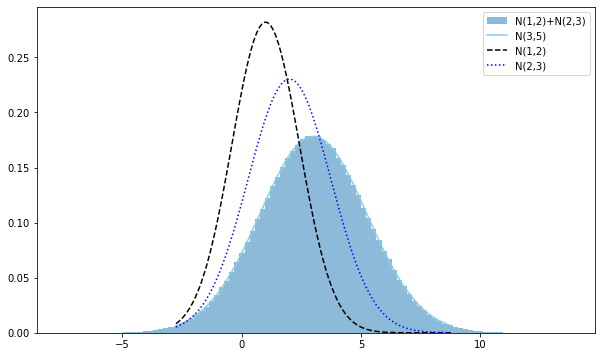

In [16]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv=stats.norm(3,np.sqrt(5))
xs=np.linspace(rv.isf(0.995),rv.isf(0.005),100)

ax.hist(sum_sample,bins=100,density=True,
       alpha=0.5,label='N(1,2)+N(2,3)')
ax.plot(xs,rv.pdf(xs),label='N(3,5)',color='skyblue')
ax.plot(xs,rv1.pdf(xs),label='N(1,2)',ls='--',color='black')
ax.plot(xs,rv2.pdf(xs),label='N(2,3)',ls=':',color='blue')
ax.legend()
plt.show()

### 포아송분포의 합
 - 서로 독립인 X~ Poi(3)과  Y~Poi(4)가 있을 때 확률변수 X+Y도 포아송 분포를 따르고 X+Y~ Poi(7)이 된다.
 - n개의 포아송 분포의 합이 되더라도 재생성에 의하여 포아송 분포를 따른다.


In [17]:
rv1=stats.poisson(3)
rv2= stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample+ Y_sample



np.mean(sum_sample),np.var(sum_sample)

(6.999034, 6.989995066843997)

C:\Users\admin\Anaconda3\envs\cakd5\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


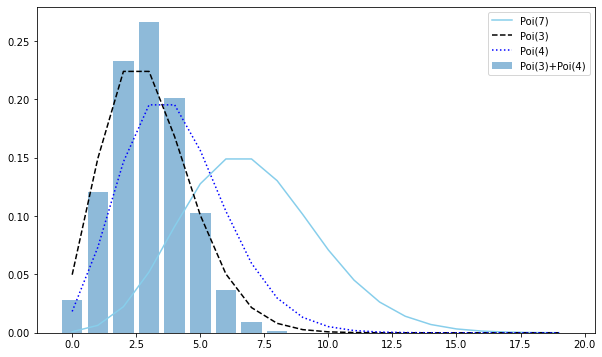

In [43]:
# 포아송분포의 합

fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv=stats.poisson(7)
xs=np.arange(20)
hist,_ = np.histogram(sum_sample,bins=20,range=(0,20),normed =True)
ax.bar(xs,hist,alpha=0.5,label='Poi(3)+Poi(4)')
ax.plot(xs,rv.pmf(xs),label='Poi(7)',color='skyblue')
ax.plot(xs,rv1.pmf(xs),label='Poi(3)',ls='--',color='black')
ax.plot(xs,rv2.pmf(xs),label='Poi(4)',ls=':',color='blue')
ax.legend()
plt.show()

In [39]:
# 베르누이 분포 성공확률이 0.3인 베르누이 분포를 따르는 확률변수 10개에 대하여
# 백만번 표본을 추출하여 표본평균과 표분분산을 산출
# 표본데이터가 하나이면 베르누이분포가 되고 표본데이터가 여럿이면 이항분포가 된다.

np.random.seed(0)
p = 0.3
rv= stats.bernoulli(p)
sample_size = int(1e6)
Xs_sample = rv.rvs((10,sample_size))
print('표본추출:',Xs_sample.shape,'\n','첫번째 열',Xs_sample[:,0],'\n')
sum_sample = np.sum(Xs_sample,axis=0)
print('성공 횟수',sum_sample,'\n')
print('성공 횟수의 평균, 분산:',np.mean(sum_sample),np.var(sum_sample,ddof=1))


표본추출: (10, 1000000) 
 첫번째 열 [0 0 1 0 0 1 0 1 0 1] 

성공 횟수 [4 5 4 ... 5 5 1] 

성공 횟수의 평균, 분산: 3.001153 2.1007397713307716


### 베르누이 분포의 합의 분포
-  베르누이 분포에는 재생성이 없다.
- 베르누이 분포의 합은 이항분포가 되는 성질이 있다.


C:\Users\admin\Anaconda3\envs\cakd5\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys


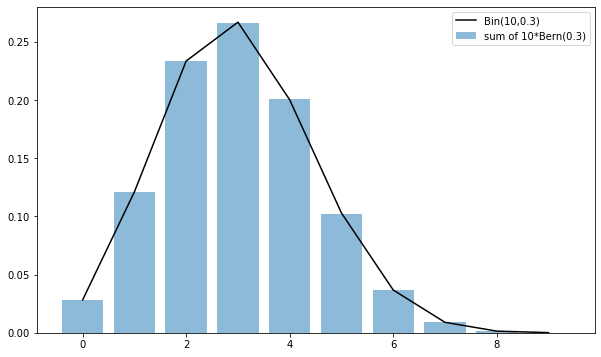

In [42]:
# 베르누이 분포의 합(이산분포니깐 정규화 normed를 하면 전체 데이서 개수 중 해당
# 구간의 값 개수가 차지하는 비율로 변환)
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv=stats.binom(10,p)
xs= np.arange(10)
hist,_ = np.histogram(sum_sample,bins=10,range=(0,10),normed=True)
ax.bar(xs,hist,alpha=0.5,label='sum of 10*Bern(0.3)')
ax.plot(xs,rv.pmf(xs),label='Bin(10,0.3)',color='black')
ax.legend()
plt.show()

###  표본평균의 분포
- 표본평균의 분포란 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1,X_2,...X_n$의 표본평균이 따르는 분포
-  이 분포는 중심극한정리나 대수의 법칙 등 추측통계에서 중요한 성질을 담고 있기 때문에 유의해야 함
<br> $E(\bar{X}) =  \mu$
 <br> $V(\bar{X})=  {\sigma}^2/n$


In [50]:
# 정규분포의 표본평균 

mean=1
var=2
rv=stats.norm(mean,np.sqrt(var))
n=10
sample_size=int(1e6)
X_sample=rv.rvs((n,sample_size))
print('표본 사이즈 10, 표본 개수 1000000:',X_sample.shape,'\n')
sample_mean=np.mean(X_sample,axis=0)
print('표본평균 백만개:',sample_mean,len(sample_mean),'\n')
print('표본평균 백만개의 평균, 분산:',np.mean(sample_mean),np.var(sample_mean))
np.mean(sample_mean),np.var(sample_mean)

표본 사이즈 10, 표본 개수 1000000: (10, 1000000) 

표본평균 백만개: [0.47455073 1.07479683 0.81029125 ... 1.4833736  1.24236352 1.2817757 ] 1000000 

표본평균 백만개의 평균, 분산: 0.9995946456339 0.19963005919032298


(0.9995946456339, 0.19963005919032298)

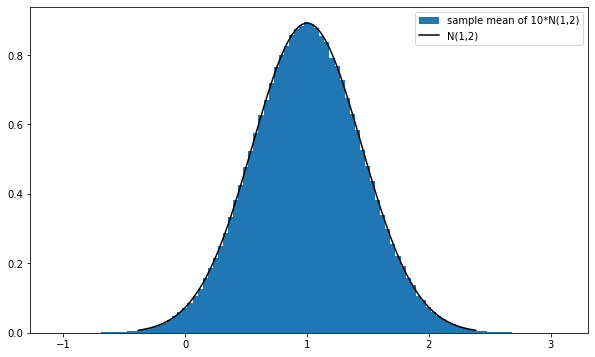

In [47]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv=stats.norm(mean,np.sqrt(var/n))
xs= np.linspace(rv.isf(0.999),rv.isf(0.001),100)
ax.hist(sample_mean,bins=100,density=True,label='sample mean of 10*N(1,2)')

ax.plot(xs,rv.pdf(xs),label='N(1,2)',color='black')
ax.legend()
plt.show()

In [55]:
# [과제] 포아송 분포의 표본평균 분포는 정규분포의 분산형태
l=3
rv=stats.poisson(l)
n=10
sample_size=int(1e6)
xs_sample = rv.rvs((n,sample_size))
sample_mean = np.mean(xs_sample,axis=0)
np.mean(sample_mean),np.var(sample_mean)

(3.0002689, 0.3004511776927901)

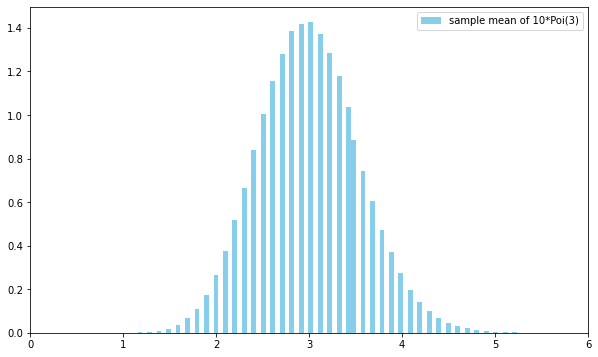

In [63]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_mean,bins=100,density=True,label='sample mean of 10*Poi(3)',color='skyblue')
ax.legend()
ax.set_xlim(0,6)
plt.show()

#### 합의 분포나 표본평균의 분포
- 포아송 분포나 정규분포같은 재생성이 있는 일부 확률분포를 제외하면 합의 분포가 어떤 형태를 보이는지
일반적으로 알 수 없다.
- 표본평균의 분포가 되면 재생성을 지닌 포아송 분포 조차도 그 형태를 유지할 수 없다.
- 원래 분포가 무엇이었든지 간에 표본평균의 분포는 정규분포에 근사한다.


#### 중심극한정리
- 확률변수 $X_1,X_2,...X_n$이 서로 독립이고 기댓값이 $\mu,분산이  {\sigma}^2$인 확률분포를 따를 때
 n이 커짐에 따라 표본평균 $\bar{X}의 분포는 정규분포 N(\mu,{\sigma}^2/n)$ 에 가까워진다.
 

In [ ]:
#[과제] 중심극한정리를 입증하세요.


#### 대수의 법칙
- 확률변수 $X_1,X_2,...X_n$이 서로 독립이고 평균이 $\mu, 분산이 \sigma^2$일 것 같은 확률분포를 따를 때 
n이 커짐에 따라 표본평균은  $\mu$ 에 수렴한다.

In [69]:
#[과제] sample size의 변화에 따라 표본평균이 모평균에 수렴함을 입증하세요
rv1 = stats.norm(1,np.sqrt(2))
rv2 = stats.norm(2,np.sqrt(3))

sample_size = int(1e6)
x_sample = rv1.rvs(sample_size)
y_sample = rv2.rvs(sample_size)
sum_sample = x_sample+y_sample

np.mean(sum_sample),np.var(sum_sample)


(3.000019644189091, 5.001838283651549)

In [ ]:
rv1 =stats.norm(1,np.sqrt(2))
rv2 = stats.norm(2,np.sqrt(3))

sample_size =int(1e6)
x_sample=